# AI_EEE205 - 3. Files, Data, and Beginning Machine Learning.

This week we will look at data and the manipulation of data. Check the following out to load in a text file and print its contents- i.e. run the code. 
Note you need to make sure that the text file is in the same folder and the notebook. 

In [1]:
f_text = open("AI_EEE205_1.txt", "r") # r means read
print(f_text.read())
f_text.close() # always close an open file when finished with it

Hello beautiful world. 
Good night and sleep tight. 

Wakey, wakey!Wakey, wakey!


Try to create your own text file and open it as above. Create a new cell below this one to do this. 

There are several ways to open, read and write to files. You can see the basics here: https://www.w3schools.com/python/python_file_handling.asp.
The following Python code opens a file in append mode to write some data on to the end of the file. It is then reopened to read and display.

In [2]:
# open file in write append mode 
f = open("AI_EEE205_1.txt", "a") # a means append
f.write("Wakey, wakey!")
f.close()
# reopen in read mode
f = open("AI_EEE205_1.txt", "r")
print(f.read())
f.close()

Hello beautiful world. 
Good night and sleep tight. 

Wakey, wakey!Wakey, wakey!Wakey, wakey!


## Basic Ideas about Statistics and Machine Learning 

Lets do some stats on list of data. Also, see https://www.w3schools.com/python/python_ml_getting_started.asp. 

In [3]:
exam_results = [60, 67, 77, 89, 54, 77, 68, 77, 60]
print(exam_results)
print(exam_results[0])

[60, 67, 77, 89, 54, 77, 68, 77, 60]
60


mean() calculates the average (as we generally think of it) of series of numbers. 
median() calculates a different sort of average - it finds the middle value of a sequence of numbers.
mode() finds the most common number in the list. 
You need to make sure that you have numpy installed on your python virtual environment. You can install the package at the commandline by: conda install numpy. Or by: pip install numpy.

In [4]:
from scipy import stats
import numpy as np
mean_result = np.mean(exam_results); print("Mean = ", mean_result)
median_result = np.median(exam_results); print("Median = ",median_result)
mode_result = stats.mode(exam_results); print("Mode object = ",mode_result)

Mean =  69.88888888888889
Median =  68.0
Mode object =  ModeResult(mode=array([77]), count=array([3]))


C:\Users\Darry\AppData\Local\Temp\ipykernel_7052\1213019968.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(exam_results); print("Mode object = ",mode_result)


In [5]:
# printing values from the class that is mode_result
print("Mode = ", mode_result.mode[0])
print("Number of same number for mode = ", mode_result.count[0])

Mode =  77
Number of same number for mode =  3


In [6]:
# standard deviation gives a number that describes how spread out the number values are
std_dev = np.std(exam_results)
# variance is a measure of the range of values - both variance and standard deviation are very important in ML 
_variance = np.var(exam_results)
print("Standard deviation is ", std_dev)
print("Variance = is ", _variance)

Standard deviation is  10.418407261983148
Variance = is  108.54320987654322


In the next few examples, let's use a larger array of exam scores - we will use a random number generator to create the list.
If you change the third number, 5000, to 30000, does the graph become more "uniform"? 

In [7]:
# this creates 5000 examples of scores between 0 and 100 in a uniform distribution (i.e. all exam scores are equally probable)
import numpy
import matplotlib.pyplot as plt

scores = numpy.random.uniform(0.0, 100.0, 5000)

plt.hist(scores, 10)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

This next version creates a normal distribution of exam marks which is more 'normal' and expected. So this shows the expected histogram of results if the distribution of marks is Normal. Try the following, then alter the values in $numpy.random.normal(50.0, 10.0, 5000)$ - where the 1st number is mean, the second standard deviation, and the third the number of data points. 

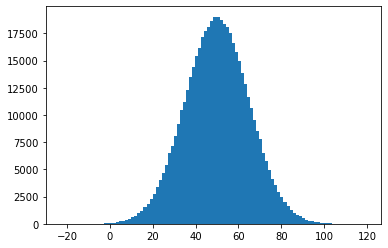

In [ ]:
# in this example the mean is 50.0 and standard deviation is 10. There are 5000 examples in the data.
import numpy
import matplotlib.pyplot as plt

scores = numpy.random.normal(50.0, 15.0, 500000)

plt.hist(scores, 100)
plt.show()

Linear regression brings us closer to ML. This model of the data assumes that the relationship between the data and a prediction is linear, e.g. $y=mx + c$
Lets look at some new data and a scatter plot of this 2D data. 

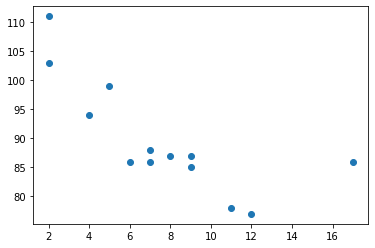

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

Have a look at this plot and imagine where you might place a line through the data dots so the line is as close to all of the dots as possible. 
Luckily, we can use linear regression and code to do this accurately for us. 
Note that "return slope * x + intercept" is like $mx + c$ as I mentioned above, where c is an intercept on the $y=0$ axis, $m$ is the gradient/slope of the line, and $x$ is the value on the x-axis that is input into the function "$myfunc(x)$".
The code below plots both the scatter plot of the data and the line that fits the data.
The function $stats.linregress(x, y)$ returns 6 values - we use slope and intercept.

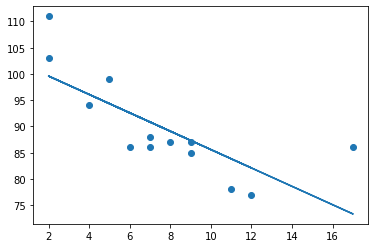

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept 

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

Once we have a model for the data, we can predict an outcome y based on an input x. In the case below if we have an input value x = 10, then we can predict that y should be around 85.6. The graphs basically shows that the lower x is the more likely that y is high.  

In [ ]:
y = myfunc(10)
print(y)
print(std_err) # this prints out the standard error of the line to the data - smaller is better

85.59308314937454
0.45353615760774213


Try your own value of x and see if the y seems correct based on the graph above - https://www.w3schools.com/python/python_ml_polynomial_regression.asp. 
Not all y/x relationships are linear. Some y's have a polynomial relationship with x - i.e. a curve explains the relationship better than a line. See the following data (x) which is best described in a non-linear way. mymodel is a model for the data that you know about and can be used to predict new values of y when you observe a data value x.

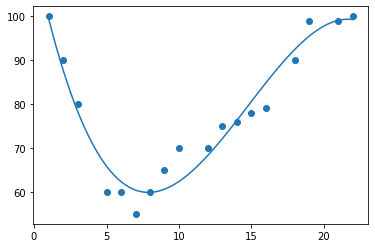

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100) # makes a list of points evenly spread over a line

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
# test the accuracy of the model - and x axis value of 20 leads to a y value of 97.8. Looks good!
print(mymodel(20))

97.76768832747513


Try a few values of x for yourself and visual examine if the model seems reasonably accurate. 